In [85]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
import matplotlib.patches as patches
import pandas as pd
from tqdm import tqdm
import cv2
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage import feature
import pickle
from sklearn.preprocessing import StandardScaler
import random
import pickle
from sklearn.utils import resample

In [2]:
from cars_detector.utils  import read_test_frame, read_frame
from cars_detector.sampling import sampling
from cars_detector.augmentation import random_augmentation
from cars_detector.features import compute_features, compute_colors_features
from cars_detector.makebox import non_max_suppression, box_otsu
from cars_detector.splitpictures import pyramid
from cars_detector.window_sliding import first_window_sliding, window_sliding_advanced
from cars_detector.hard_negative_sampling import hard_negative_sampling
from cars_detector.encoding import bounding_boxes_to_mask, run_length_encoding

In [2]:
df_ground_truth = pd.read_csv('train.csv')

In [116]:
boxes_array = pd.read_pickle('boxes_and_array.pkl')

In [27]:
i = 1
j = i+1
img1 = imread('./test/'+str(i).zfill(3)+'.jpg')
img2 = imread('./test/'+str(j).zfill(3)+'.jpg')
boxes1 = boxes_array.query('image==@i').boxes

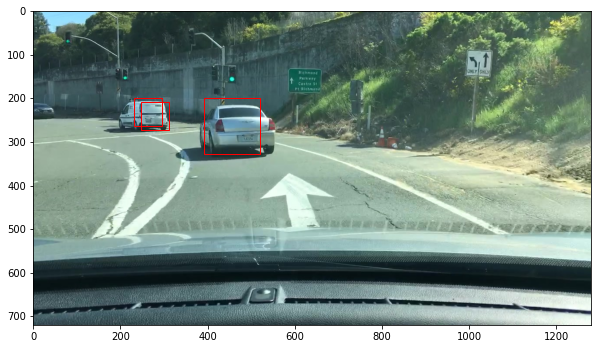

In [162]:
i = 174
img1 = imread('./test/'+str(i).zfill(3)+'.jpg')
boxes1 = boxes_array.query('image==@i').boxes.values[0]
fig, ax = plt.subplots(figsize=(10, 8))

for x, y, dx, dy in boxes1:

    rect = patches.Rectangle((x, y), dx, dy, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.imshow(img1)